In [263]:
import numpy as np
import pandas as pd

In [304]:
words_clean = pd.read_csv("google-10000-english-usa-no-swears.txt", header=None).iloc[:, 0].values.astype(str)
words_common = pd.read_csv("count_1w.txt", header=None, sep = '\t').iloc[:, 0].values.astype(str)
words_all = pd.read_csv("collins2019.txt").iloc[:, 0].values.astype(str)
words_all = np.array([w.lower() for w in words_all])

In [305]:
words_common2 = np.concatenate([words_clean, words_common[10000:]])

In [306]:
len(words_common2)

333217

In [377]:
length = 8

In [378]:
wc = np.array([w for w in words_common2 if len(w) == length])
wa = np.array([w for w in words_all if len(w) == length])

In [379]:
wa = set(wa)
wc_filt = np.array([w for w in wc if w in wa])


In [380]:
wc_filt

array(['business', 'services', 'products', ..., 'outcross', 'mindfuck',
       'loadstar'], dtype='<U8')

In [381]:
positional_trigrams = []
wc_uniq = []
for i in range(length):
    positional_trigrams.append({})

for w in wc_filt:
    # check if w collides with any trigram
    flag = True
    for i in range(length):
        tri = (w+w)[i:(i+3)]
        if tri in positional_trigrams[i].keys():
            flag = False
    if flag:
        wc_uniq.append(w)
        # add w to list and add trigrams to dicts
        for i in range(length):
            tri = (w+w)[i:(i+3)]
            positional_trigrams[i][tri] = 1
        
#wc_uniq = np.array(wc_uniq)

In [382]:
for w in wc:
    # check if w collides with any trigram
    flag = True
    for i in range(length):
        tri = (w+w)[i:(i+3)]
        if tri in positional_trigrams[i].keys():
            flag = False
    if flag:
        wc_uniq.append(w)
        # add w to list and add trigrams to dicts
        for i in range(length):
            tri = (w+w)[i:(i+3)]
            positional_trigrams[i][tri] = 1
        
wc_uniq = np.array(wc_uniq)

In [383]:
len(wc_uniq)

1041

In [384]:
#np.savetxt('len7.txt', wc_uniq, fmt = '%s')

In [385]:
pd.DataFrame({'words': wc_uniq}).to_csv('len%i.csv' % length)

In [386]:
pd.DataFrame({'words': np.sort(wc_uniq)}).to_csv('len%i_sorted.csv' % length)

In [387]:
pd.DataFrame({'words': np.sort(wc_uniq[:1000])}).to_csv('len%i_1k_sorted.csv' % length)

## Shuffle ints by sorting words by substring

In [388]:
wlist = np.sort(wc_uniq[:1000])

In [389]:
wlist[0:5]

array(['aanwezig', 'abattoir', 'abebooks', 'abingdon', 'ablonczy'],
      dtype='<U8')

In [390]:
from matplotlib import pyplot as plt

In [412]:
i = 6
order = np.argsort(np.array([w[i:] + w[:i] for w in wlist]))

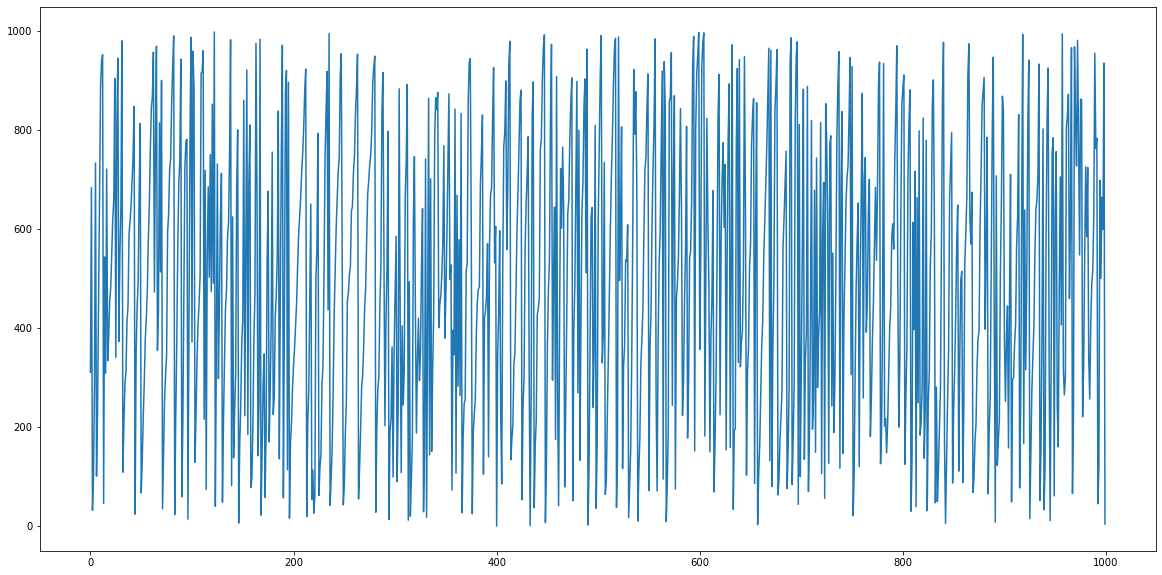

In [413]:
plt.figure(figsize=(20,10))
plt.plot(order)

In [414]:
wlist[order]

array(['fermilab', 'pchildab', 'amnesiac', 'bergerac', 'etodolac',
       'raflatac', 'bhagavad', 'download', 'ironclad', 'olympiad',
       'touchpad', 'voorraad', 'wellhead', 'apiaceae', 'longleaf',
       'feiertag', 'punchbag', 'fujairah', 'haggadah', 'issaquah',
       'kabbalah', 'madrasah', 'nehemiah', 'ooltewah', 'tzedakah',
       'gansbaai', 'siauliai', 'waihopai', 'grosbeak', 'luchtzak',
       'nushagak', 'yitzchak', 'bisexual', 'dhaliwal', 'ethereal',
       'festival', 'hospital', 'informal', 'mohanlal', 'national',
       'official', 'physical', 'referral', 'suicidal', 'aliquyam',
       'getpwnam', 'ingraham', 'kilogram', 'oxazepam', 'skilljam',
       'atikokan', 'bryozoan', 'diocesan', 'etruscan', 'guardian',
       'huangyan', 'jonathan', 'michigan', 'okinawan', 'rhuddlan',
       'suburban', 'talisman', 'wingspan', 'joaojoao', 'rotflmao',
       'xiaoxiao', 'gilstrap', 'imagemap', 'skullcap', 'kuujjuaq',
       'twikifaq', 'amritsar', 'calendar', 'echostar', 'farquh